In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Kaggle Competition : Titanic Project Analysis

## 1.0 Introduction

This project is the analysis for the infamous Kaggle Titanic Problem. The Kaggle Titanic Problem is one of THE kaggle problem that is directed to people who want to delve into Data Analysis. The aim is to use the dataset to predict survivability/suvivorship of the passengers.

In this project, I will not only try to predict the survivorbility of the passengers, but also use this as a journal-mapping to practice my Analytical thinking.

I hope you will enjoy reading my work.

## 2.0 Objective

The objective is to build a predictive model that accurately classifies passengers as survivors or non-survivors. 

<i>***Since the task is to determine survivor or not ( and nothing in between exist), we can see this is clearly a classification problem. </i>

## 3.0 Methodology Outline
This section discuss the workflow planning and the steps to approach the problem to achieve the objective.

We begin by importing the necessary libraries for data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

And then, loading the data.



<i>(Keep in mind the data is already split into test.csv and train.csv)</i>

In [3]:
#read csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



Lets see what each of the files look like.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


The dataset contains 418 entries (rows) with a RangeIndex from 0 to 417.

The "Non-Null Count" for each column indicates the number of non-missing (non-null) values.

<ul>
    <li>The "Age" column has 332 non-null values, meaning there are missing values in this column.</li>
<li>The "Fare" column has 417 non-null values, suggesting there is one missing value in this column.</li>
<li>The "Cabin" column has only 91 non-null values, indicating a significant number of missing values.</li>
</ul>

# 3.1 Raw Data Discovery
We will begin by analyzing the data given. We are given 3 data, train, test, and another gender data file. The test and train are typical practice in doing ML study where train data either consist of (70% or 80%) of the raw data being used to train ML models. The remaining 20%/30% is used as "unseen data" by the model to validate the model.

Suffice to say, the presentatition of the given data suggest that the data cleaning etc has been done and ready to be used for ML training.

However, it is best practice to do our due diligence and dive into the data itself.

In [6]:
import pandas as pd
import numpy as np



# make new column to label train (1) and test (0) data
train['train_test'] = 1  # train_test value set to 1 for train data
test['train_test'] = 0  # train_test value set to 0 for test data

# set survived column to NaN on test dataset, this is to eliminate existing label , to use in prediction later on
test['Survived'] = np.NaN

# combine
all_data = pd.concat([train, test])

%matplotlib inline


In [7]:
## see columns of the new data
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# Project Planning

There are two types of cases for typical data analysis project, classification and regression. Since we  are looking to predict wether a passenger survived or not, this means it is a Classification case. ie you either survived or didnt, no in between.

In [8]:
#quick loook at the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [10]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [11]:
#seperate the train df into 2 separate df, categorized by data types: numeric(df_num) and category(df_cat)
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


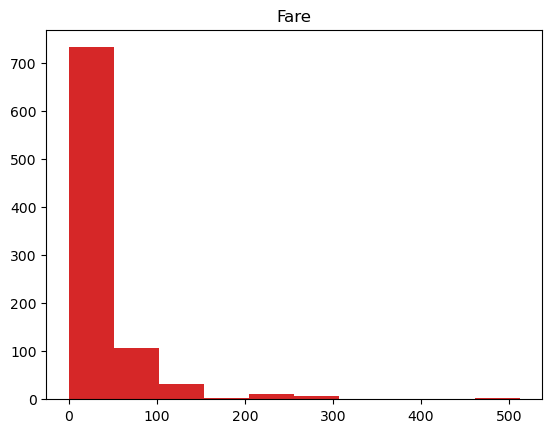

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

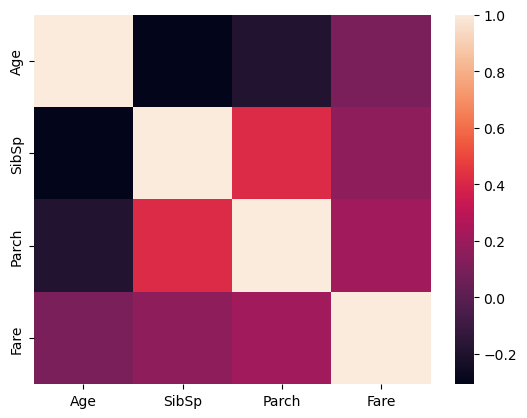

In [13]:
print(df_num.corr())
sns.heatmap(df_num.corr())

<h3>The correlation coefficient ranges from -1 to 1, where:</h3>

<ul>
    <li>1 indicates a perfect positive correlation,</li>
    <li>-1 indicates a perfect negative correlation, </li>
    <li>0 indicates no correlation.</li>
</ul>


Here's an interpretation based on the correlation matrix:


| Parameter Pair | Correlation Value | Comment |
|----------|----------|----------|
| Age vs Age | 1 | The correlation of a variable with itself is always 1, as seen in the top-left cell|
| Age vs SibSp | -0.31 | There is a negative correlation of approximately -0.31 between Age and SibSp. This suggests that, on average, as the age increases, the number of siblings/spouses tends to decrease. |
| Age vs Parch | -0.19| There is a negative correlation of approximately -0.19 between Age and Parch. This implies that, on average, as the age increases, the number of parents/children tends to decrease. |
| Age vs Fare | 0.10 | There is a positive correlation of approximately 0.10 between Age and Fare. This indicates that, on average, as the age increases, the fare tends to increase slightly. |
| SibSp vs SibSp | 1 | R The correlation of a variable with itself is always 1. |
| SibSp vs Parch | 0.41 | here is a positive correlation of approximately 0.41 between SibSp and Parch. This suggests that, on average, individuals with more siblings/spouses also tend to have more parents/children aboard. |
| SibSp vs Fare| 0.16|  There is a positive correlation of approximately 0.16 between SibSp and Fare. This implies that, on average, individuals with more siblings/spouses tend to pay a higher fare. |
| Parch vs Parch | 1 | The correlation of a variable with itself is always 1 |
| Parch vs Fare | 0.22|  There is a positive correlation of approximately 0.22 between Parch and Fare. This suggests that, on average, individuals with more parents/children aboard tend to pay a higher fare.|
|Fare vs Fare | 1 |The correlation of a variable with itself is always 1.|


<h3><strong>!important : Correlation does not equal causation. this is simply for exploring data</strong></h3>



In [14]:
# comparing survival rate across Age, Sibsp, Parch and fare
ptable = pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
ptable

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


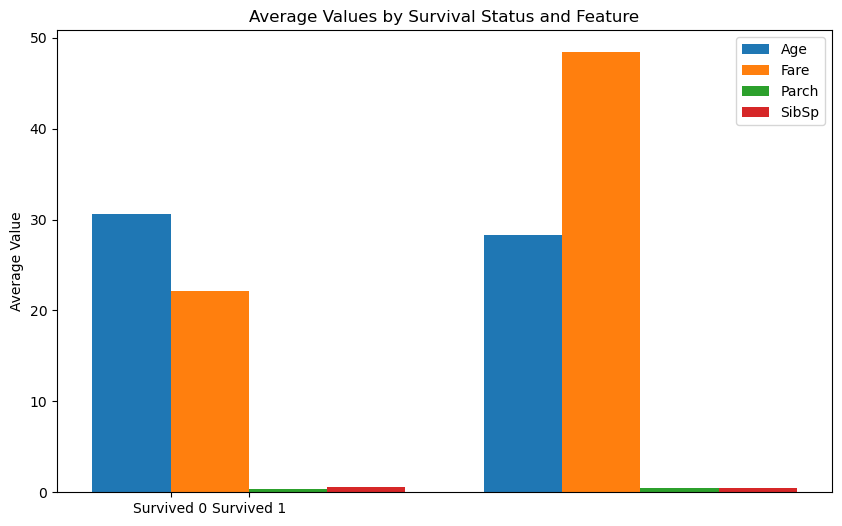

In [15]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2

for i, (feature, values) in enumerate(ptable.items()):
    x = [bar_width * i + j for j in range(len(ptable.index))]
    ax.bar(x, values, width=bar_width, label=feature)
ax.set_xticks([bar_width / 2 + bar_width * i for i in range(len(ptable.index))])
ax.set_xticklabels(['Survived 0', 'Survived 1'])
ax.legend()


ax.set_ylabel('Average Value')
ax.set_title('Average Values by Survival Status and Feature')

# Show the plot
plt.show()

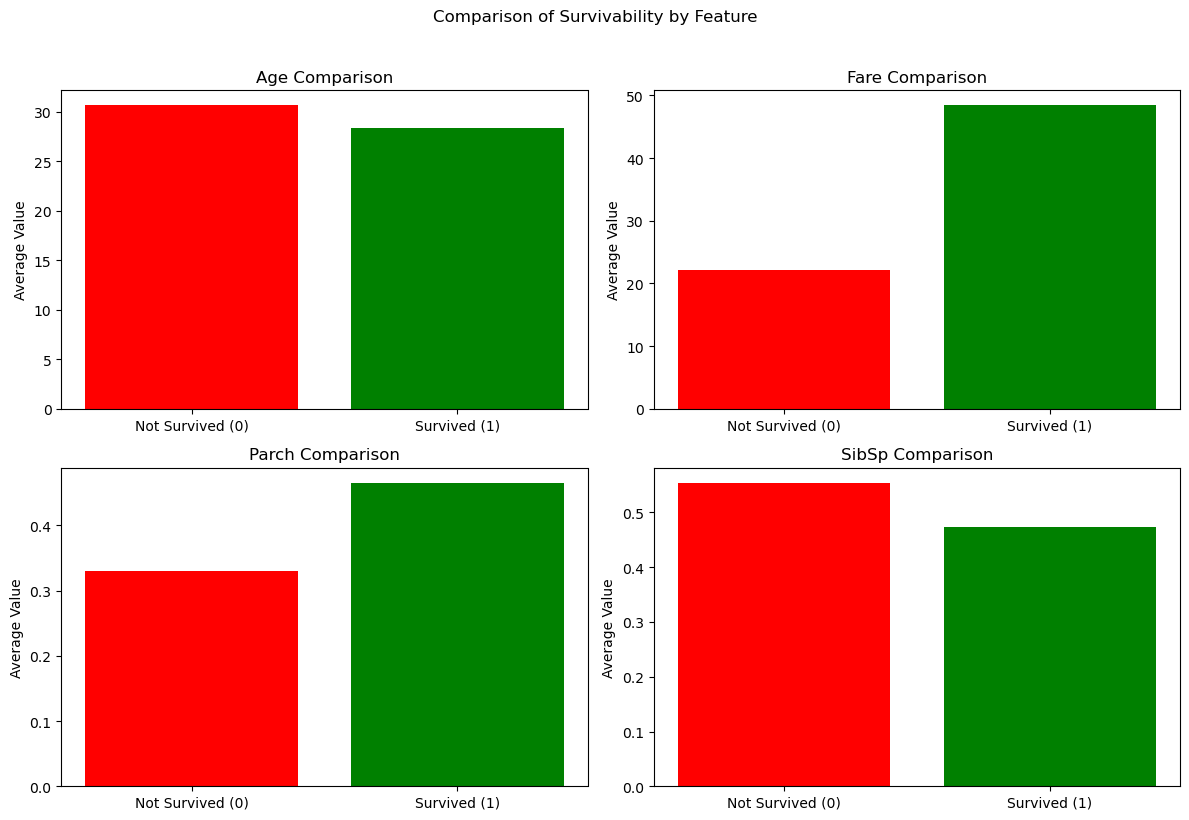

In [16]:
import matplotlib.pyplot as plt
import pandas as pd



# Plotting individual bar charts for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Comparison of Survivability by Feature', y=1.02)

for ax, (feature, values) in zip(axes.flatten(), ptable.items()):
    ax.bar(ptable.index, values, color=['red', 'green'])
    ax.set_title(f'{feature} Comparison')
    ax.set_xticks(ptable.index)
    ax.set_xticklabels(['Not Survived (0)', 'Survived (1)'])
    ax.set_ylabel('Average Value')

plt.tight_layout()
plt.show()


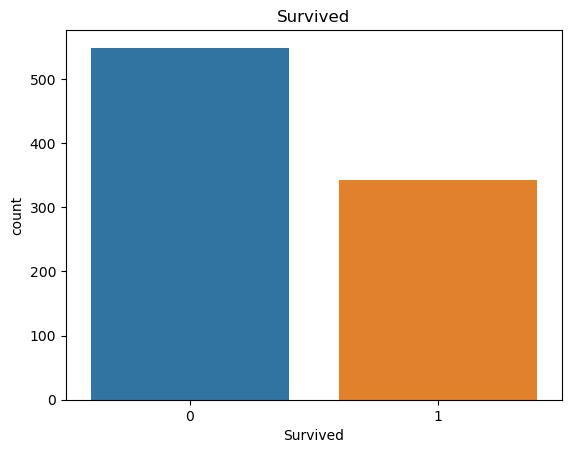

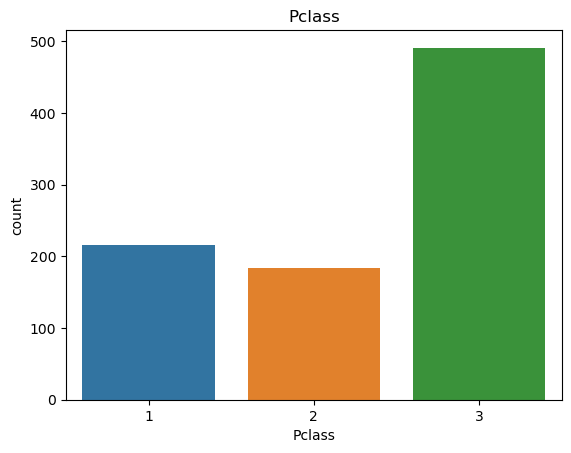

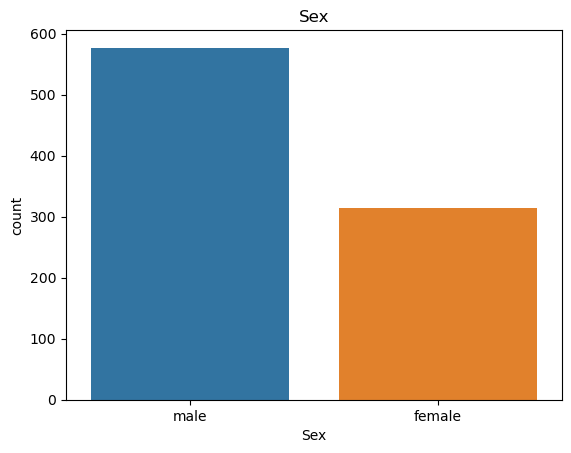

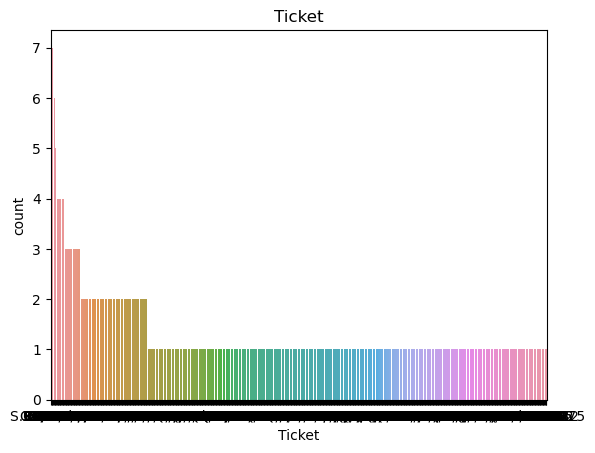

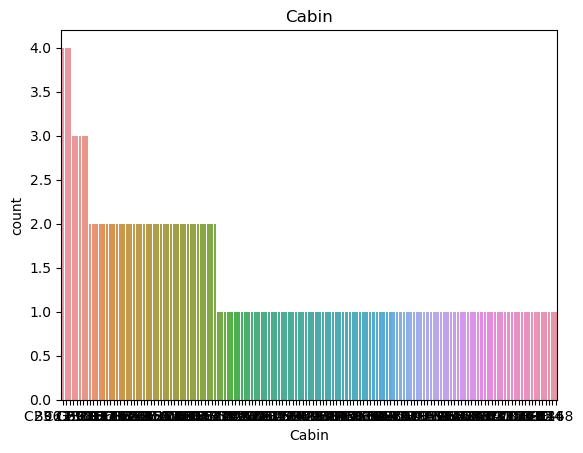

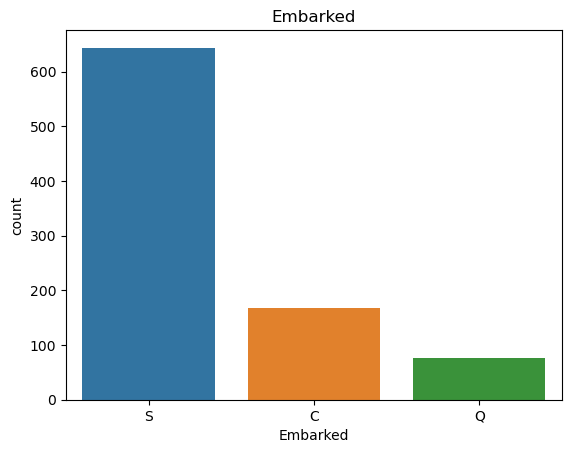

In [17]:
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering!

In [18]:
print(pd.pivot_table(train,index = 'Survived', columns='Pclass', values='Ticket',aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [19]:
print(pd.pivot_table(train,index = 'Survived', columns='Sex', values='Ticket',aggfunc='count'))


Sex       female  male
Survived              
0             81   468
1            233   109


In [20]:
print(pd.pivot_table(train,index='Survived',columns='Embarked', values='Ticket', aggfunc='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering

1) Check if cabbin letters(cabin position) or tickets accross multiple cabin shows any impact on survivor

2) Do tickets type affect survival rate?

3) Do (persons) title affect Survival rate?

In [21]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 

In [22]:
# //df_cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()



cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

**Footnote: Understanding 'cabin_multiple' Column**

The 'cabin_multiple' column is derived from the 'Cabin' column in the 'train' DataFrame. For each entry:
- If the 'Cabin' value is missing (NaN), 'cabin_multiple' is set to 0.
- If the 'Cabin' value is not missing, 'cabin_multiple' is set to the count of cabins indicated by splitting the 'Cabin' value on spaces.

The resulting 'cabin_multiple' column provides insights into the distribution of the number of cabins associated with each entry in the dataset.


In [23]:
pd.pivot_table(train, index='Survived', columns='cabin_multiple', values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


Thank you for the clarification. If the numbers in the 'cabin_multiple' column represent the number of letters (characters) in the 'Cabin' column rather than the count of cabins, then the interpretation would be different.

Here's the revised interpretation:

- **Rows:** The 'Survived' status with values 0 and 1 (0 representing not survived and 1 representing survived).
- **Columns:** Different counts of letters in the 'Cabin' values, ranging from 0 to 4.

Interpretation of values:

- For passengers who did not survive (Survived = 0):
  - 481 passengers had no information in the 'Cabin' column (N/A).
  - 58 passengers had 'Cabin' values with 1 letter.
  - 7 passengers had 'Cabin' values with 2 letters.
  - 3 passengers had 'Cabin' values with 3 letters.
  - There is no information about the number of passengers with 'Cabin' values having 4 letters.

- For passengers who survived (Survived = 1):
  - 206 passengers had no information in the 'Cabin' column (N/A).
  - 122 passengers had 'Cabin' values with 1 letter.
  - 9 passengers had 'Cabin' values with 2 letters.
  - 3 passengers had 'Cabin' values with 3 letters.
  - 2 passengers had 'Cabin' values with 4 letters.

This interpretation suggests the distribution of the number of letters in the 'Cabin' values for passengers based on their survival status. It could be interesting for exploring potential correlations between the length of 'Cabin' values and the likelihood of survival.

In [24]:
#create categories based on the cabin letter
# treat null values , n, as its own category

train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
train['cabin_adv']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_adv, Length: 891, dtype: object

In [25]:
train['cabin_adv'].value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [26]:
#understanding ticket values
#numeric vs non-numeric

train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)



In [27]:
train['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [28]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.reset_option("max_rows")
pd.set_option("max_rows", None)
train['ticket_letters'].value_counts()


OptionError: Pattern matched multiple keys

In [ ]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(train,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254



It looks like you have a contingency table showing the counts of passengers based on two variables: 'numeric_ticket' (with values 0 and 1) and 'Survived' (with values 0 and 1). Each cell in the table represents the count of passengers with a specific combination of these variables.

Here's the interpretation:

For passengers who did not survive (Survived = 0):

142 passengers had a non-numeric ticket ('numeric_ticket' = 0).
407 passengers had a numeric ticket ('numeric_ticket' = 1).
For passengers who survived (Survived = 1):

88 passengers had a non-numeric ticket ('numeric_ticket' = 0).
254 passengers had a numeric ticket ('numeric_ticket' = 1).
This table provides a breakdown of survival counts based on the type of ticket (numeric or non-numeric). It could be useful for analyzing whether there is any correlation between the type of ticket and the likelihood of survival.

In [ ]:
#survival rate across different ticket types
pd.pivot_table(train, index='Survived', columns='ticket_letters', values= 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


The provided table appears to show the counts of passengers based on the combination of 'ticket_letters' and 'Survived'. Each cell represents the count of passengers with a specific type of ticket letter and their survival status.

Here's an interpretation:

- **Rows:** The 'Survived' status with values 0 and 1 (0 representing not survived and 1 representing survived).
- **Columns:** Different types of ticket letters.

Interpretation of values:

- For passengers who did not survive (Survived = 0):
  - 410 passengers had a ticket with no letter ('ticket_letters' = 0).
  - There are counts for various ticket letters such as 'a4', 'a5', 'as', 'c', 'ca', 'casoton', 'fa', 'fc', 'fcc', and so on.

- For passengers who survived (Survived = 1):
  - 255 passengers had a ticket with no letter ('ticket_letters' = 0).
  - There are counts for various ticket letters, including 'a5', 'c', 'ca', 'casoton', 'fc', 'fcc', and others.

The table provides a breakdown of survival counts based on the type of ticket letters. It could be useful for analyzing whether certain ticket letter categories are associated with a higher or lower likelihood of survival. Note that 'NaN' values indicate missing data in the corresponding categories.

In [ ]:
#Persons Title
#Feature ENgineering

train.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [ ]:
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#extracting titles; mr, ms, master 
train['name_title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name_title, Length: 891, dtype: object

In [ ]:
train['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

# Data Preprocessing for Model